In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2

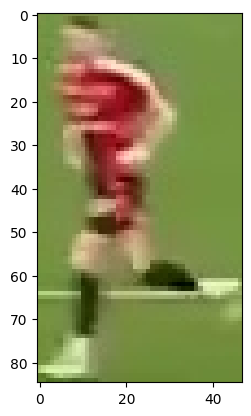

In [2]:

image_path = 'player_crops_all/frame_0000/player_11.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

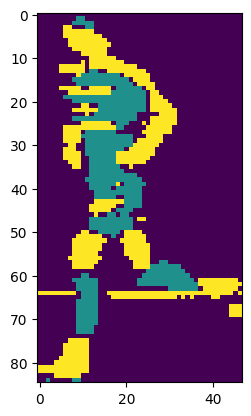

In [4]:

image_path = 'player_crops_all/frame_0000/player_11.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_2d = image.reshape(-1,3)

# perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the label
clustered_image = labels.reshape(image.shape[0], image.shape[1])

# display the clusterd image
plt.imshow(clustered_image)

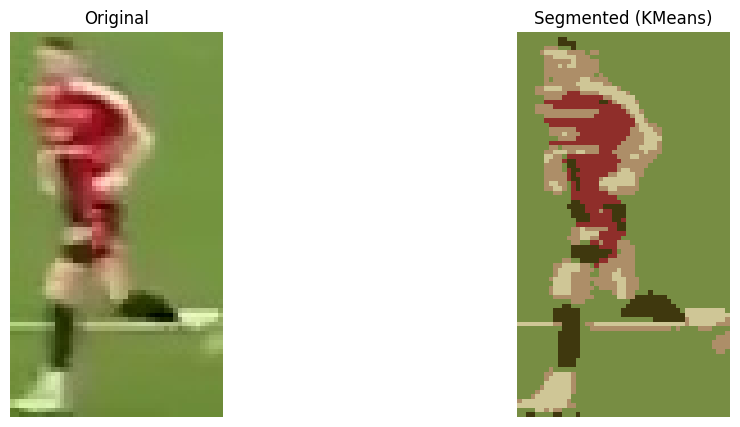

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load and convert image
image_path = 'player_crops_all/frame_0000/player_11.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Run KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(pixels)

# Get cluster labels
labels = kmeans.labels_
segmented_img = labels.reshape(image_rgb.shape[:2])

# Map cluster centers to RGB
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)
segmented_rgb = cluster_centers[labels].reshape(image_rgb.shape)

# Plot segmented image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented (KMeans)')
plt.imshow(segmented_rgb)
plt.axis('off')
plt.show()


Cluster RGB colors:
Cluster 0: RGB = (np.uint8(130), np.uint8(154), np.uint8(89))
Cluster 1: RGB = (np.uint8(220), np.uint8(232), np.uint8(212))
Cluster 2: RGB = (np.uint8(83), np.uint8(91), np.uint8(53))
Cluster 3: RGB = (np.uint8(154), np.uint8(164), np.uint8(145))
Cluster 4: RGB = (np.uint8(194), np.uint8(208), np.uint8(175))


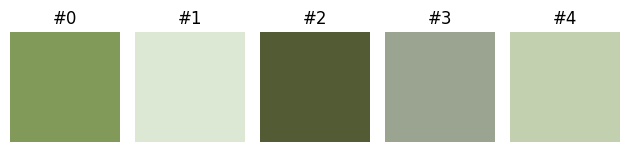

In [8]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'player_crops_all/frame_0004/player_6.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to (num_pixels, 3)
pixels = image_rgb.reshape(-1, 3)

# KMeans Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_.reshape(image_rgb.shape[:2])
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)  # shape (k, 3)

# Display each cluster color as a swatch
print("Cluster RGB colors:")
for i, color in enumerate(cluster_centers):
    print(f"Cluster {i}: RGB = {tuple(color)}")

    # Show as color block
    swatch = np.full((50, 50, 3), color, dtype=np.uint8)
    plt.subplot(1, k, i+1)
    plt.imshow(swatch)
    plt.title(f"#{i}")
    plt.axis('off')

plt.tight_layout()
plt.show()
